In [37]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from tensorflow.keras import Sequential,layers
from sklearn.utils import shuffle
from skimage.transform import resize
from sklearn.metrics import confusion_matrix
from glob import glob
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [2]:
damage_train=glob('train_another/damage/*.jpeg')[0:1000]
no_damage_train=glob('train_another/no_damage/*.jpeg')[0:1000]
damage_test=glob('test_another/damage/*.jpeg')[0:1000]
no_damage_test=glob('test_another/no_damage/*.jpeg')[0:1000]

In [21]:
damage_val=glob('validation_another//damage/*.jpeg')[0:1000]
no_damage_val=glob('validation_another//no_damage/*.jpeg')[0:1000]

In [3]:
classes={0:'Damage',1:'No_Damage'}

In [4]:
images_train=[]
labels_train=[]

for i in damage_train:
            img=plt.imread(i)
            images_train.append(img)
            labels_train.append(0)

for i in no_damage_train:
            img=plt.imread(i)
            images_train.append(img)
            labels_train.append(1)


In [5]:
images_test=[]
labels_test=[]

for i in damage_test:
            img=plt.imread(i)
            images_test.append(img)
            labels_test.append(0)
    

for i in no_damage_test:
            img=plt.imread(i)
            images_test.append(img)
            labels_test.append(1)

In [22]:
images_val=[]
labels_val=[]

for i in damage_val:
            img=plt.imread(i)
            images_val.append(img)
            labels_val.append(0)
    

for i in no_damage_val:
            img=plt.imread(i)
            images_val.append(img)
            labels_val.append(1)

In [6]:
images_train,labels_train=shuffle(images_train,labels_train,random_state=100)

In [7]:
images_test,labels_test=shuffle(images_test,labels_test,random_state=100)

In [23]:
images_val,labels_val=shuffle(images_val,labels_val,random_state=100)

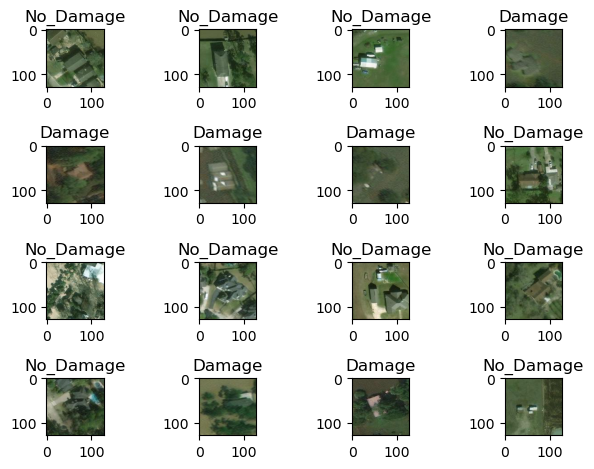

In [8]:
for i in range(16):
    plt.subplot(4,4,i+1)
    plt.imshow(images_train[i])
    plt.title(classes[labels_train[i]])
plt.tight_layout()

In [9]:
x_train=np.array(images_train)
x_test=np.array(images_test)
y_train=np.array(labels_train)
y_test=np.array(labels_test)

In [24]:
x_val=np.array(images_val)
y_val=np.array(labels_val)

In [12]:
x_train.shape

(2000, 128, 128, 3)

In [13]:
x_test.shape

(2000, 128, 128, 3)

In [14]:
y_train.shape

(2000,)

In [25]:
model=Sequential([
    layers.Conv2D(16,(3,3),activation='relu',input_shape=(128, 128, 3)),
    layers.MaxPool2D(),
    
    layers.Conv2D(32,(3,3),activation='relu'),
    layers.MaxPool2D(),
    
    layers.Conv2D(64,(3,3),activation='relu'),
    layers.MaxPool2D(),
    
    layers.Flatten(),
    
    layers.Dense(64,activation='relu'),
    layers.Dense(32,activation='relu'),
    layers.Dense(1,activation='sigmoid')
])

In [26]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 126, 126, 16)      448       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 63, 63, 16)       0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 61, 61, 32)        4640      
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 30, 30, 32)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 28, 28, 64)        18496     
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 14, 14, 64)      

In [27]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [28]:
model.fit(x_train,y_train,epochs=30,validation_data=(x_val,y_val))

Epoch 1/30
63/63 [==============================] - 46s 674ms/step - loss: 2.2214 - accuracy: 0.6435 - val_loss: 0.6581 - val_accuracy: 0.5530
Epoch 2/30
63/63 [==============================] - 47s 745ms/step - loss: 0.3931 - accuracy: 0.8250 - val_loss: 0.5238 - val_accuracy: 0.8070
Epoch 3/30
63/63 [==============================] - 46s 734ms/step - loss: 0.3103 - accuracy: 0.8755 - val_loss: 0.9056 - val_accuracy: 0.6120
Epoch 4/30
63/63 [==============================] - 38s 607ms/step - loss: 0.2052 - accuracy: 0.9195 - val_loss: 0.5146 - val_accuracy: 0.8180
Epoch 5/30
63/63 [==============================] - 35s 560ms/step - loss: 0.1099 - accuracy: 0.9655 - val_loss: 1.0158 - val_accuracy: 0.7105
Epoch 6/30
63/63 [==============================] - 36s 576ms/step - loss: 0.0893 - accuracy: 0.9660 - val_loss: 0.4535 - val_accuracy: 0.8595
Epoch 7/30
63/63 [==============================] - 38s 601ms/step - loss: 0.0688 - accuracy: 0.9780 - val_loss: 0.6310 - val_accuracy: 0.8455

In [29]:
model.evaluate(x_train,y_train)

63/63 [==============================] - 9s 136ms/step - loss: 8.5794e-05 - accuracy: 1.0000


[8.579382119933143e-05, 1.0]

In [30]:
y_pred=model.predict(x_test)

63/63 [==============================] - 9s 137ms/step


In [31]:
y_pred

array([[1.        ],
       [0.9983254 ],
       [0.9999997 ],
       ...,
       [0.9526896 ],
       [0.28216925],
       [0.995704  ]], dtype=float32)

In [33]:
predicted=[]
for i in y_pred:
        if i>0.5:
            predicted.append(1)
        else:
            predicted.append(0)

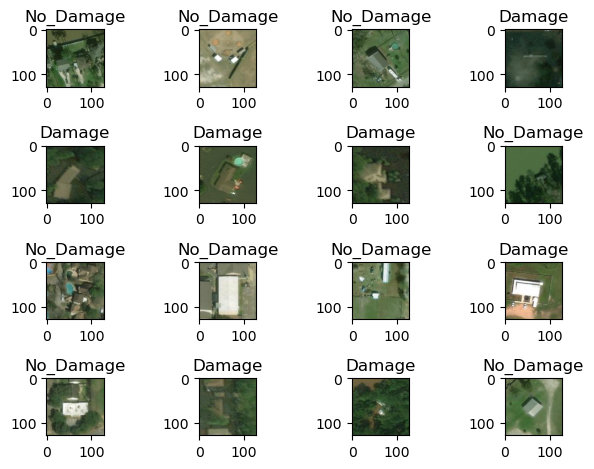

In [36]:
for i in range(16):
    plt.subplot(4,4,i+1)
    plt.imshow(x_test[i])
    plt.title(classes[predicted[i]])
plt.tight_layout()

In [38]:
accuracy_score(y_test,predicted)

0.8755

<AxesSubplot:>

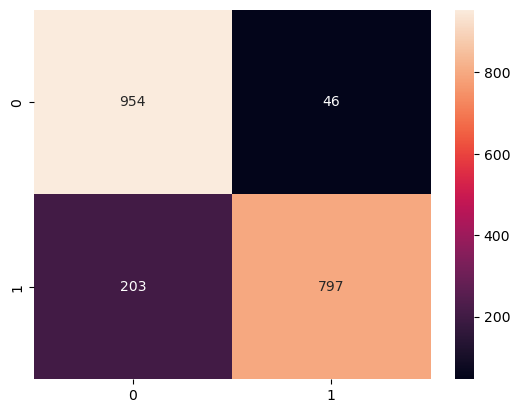

In [40]:
sns.heatmap(confusion_matrix(y_test,predicted),annot=True,fmt='d')

In [41]:
print(classification_report(y_test,predicted))

              precision    recall  f1-score   support

           0       0.82      0.95      0.88      1000
           1       0.95      0.80      0.86      1000

    accuracy                           0.88      2000
   macro avg       0.88      0.88      0.87      2000
weighted avg       0.88      0.88      0.87      2000

